# Gender

Some graphs for visualising gender in relation to various other factors.

In [797]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid")
plt.rc("font", size=14)

In [798]:
df = pd.read_csv("../data/all_covariates.csv", index_col="index")
df.head(n=10)

,year,from_code2,votes,to_country,lang_own,lang_eng,lang_other,has_border,migration_band,migration_year,to_code2,to_code3,population,count,prop_emigrants,gender,comps_without_win
index,,,,,,,,,,,,,,,,,
0,1999,AT,12.0,Bosnia and Herzegovina,0.0,0.0,1.0,NaN,2000,2000,BA,BIH,4179350.0,273,0.000065,group,43
1,1999,AT,0.0,Belgium,0.0,1.0,0.0,NaN,2000,2000,BE,BEL,10251250.0,2486,0.000243,female,12
2,1999,AT,0.0,Cyprus,1.0,0.0,0.0,NaN,2000,2000,CY,CYP,948237.0,161,0.000170,female,43
3,1999,AT,10.0,Germany,0.0,0.0,1.0,1.0,2000,2000,DE,DEU,82211508.0,181487,0.002208,group,16
4,1999,AT,5.0,Denmark,0.0,1.0,0.0,NaN,2000,2000,DK,DNK,5339616.0,1525,0.000286,group,35
5,1999,AT,3.0,Estonia,1.0,1.0,0.0,NaN,2000,2000,EE,EST,1396985.0,0,0.000000,group,43
6,1999,AT,0.0,Spain,1.0,0.0,0.0,NaN,2000,2000,ES,ESP,40567864.0,5548,0.000137,female,29
7,1999,AT,0.0,France,1.0,0.0,0.0,NaN,2000,2000,FR,FRA,60921384.0,12429,0.000204,female,21
8,1999,AT,0.0,United Kingdom,1.0,1.0,0.0,NaN,2000,2000,GB,GBR,58892514.0,18851,0.000320,group,1


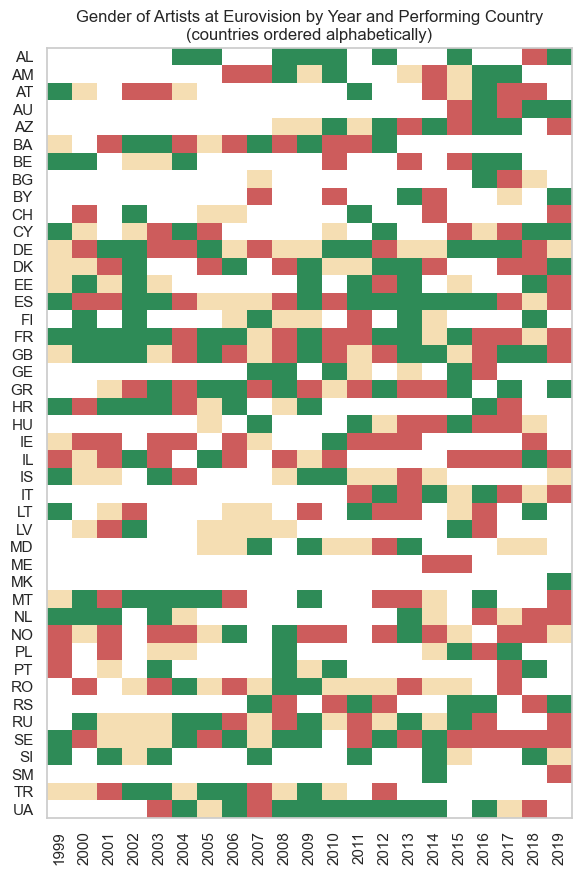

In [799]:
gender_df = df[['year', 'to_code2', 'gender']].copy().drop_duplicates()

countries = gender_df.sort_values(by=['to_code2'])['to_code2'].drop_duplicates().to_list()
years = gender_df['year'].drop_duplicates().to_list()

colours = {
    'female': to_rgba('seagreen'),
    'group': to_rgba('wheat'),
    'male': to_rgba('indianred'),
    'none': to_rgba('white')
}

gender = []
for year in years:
    missing = pd.DataFrame({'year': [year] * len(countries), 'to_code2': countries, 'gender': ['none'] * len(countries)}).set_index('to_code2')
    missing.update(gender_df[gender_df['year'] == year].set_index('to_code2'))
    gender.append(list(map(lambda x: colours[x], missing.sort_values(by=['to_code2'])['gender'].to_list())))

gender = list(map(list, zip(*gender)))
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
img = plt.imshow(gender, aspect=0.7)
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
plt.xticks(rotation=90)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.grid(False)
plt.title('Gender of Artists at Eurovision by Year and Performing Country\n(countries ordered alphabetically)')
plt.show()

In [800]:
gender_df = df[['year', 'to_code2', 'gender']].copy().drop_duplicates()
for gender in ['female', 'male', 'group']:
    count = len(gender_df[gender_df['gender'] == gender])
    print('Total {} performers: {} ({:.0%})'.format(gender, count, count/len(gender_df)))

def ratio(gender, x): return len([a for a in x if a == gender]) / len(x)

gender_df = gender_df.groupby('to_code2').agg(
    female=pd.NamedAgg(column='gender', aggfunc=lambda x: ratio('female', x)),
    group=pd.NamedAgg(column='gender', aggfunc=lambda x: ratio('group', x)),
    male=pd.NamedAgg(column='gender', aggfunc=lambda x: ratio('male', x)),
)
gender_df = gender_df.sort_values(by=['female', 'group'], ascending=False)

gender_df.head()

Total female performers: 206 (40%)
Total male performers: 173 (34%)
Total group performers: 133 (26%)


,female,group,male
to_code2,,,
MK,1.000000,0.000000,0.000000
AL,0.888889,0.000000,0.111111
SI,0.700000,0.300000,0.000000
UA,0.666667,0.133333,0.200000
AU,0.600000,0.000000,0.400000


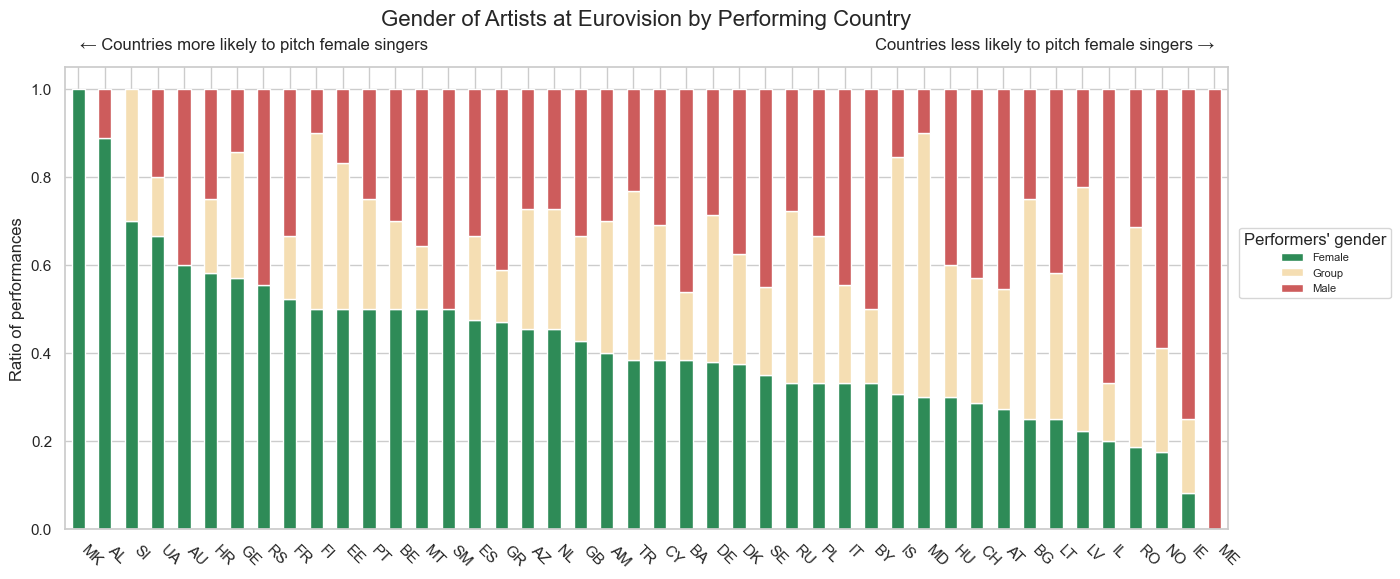

In [801]:
gender_df[colors.keys()].plot(kind='bar', figsize=(15, 6), stacked=True, color=colors)
plt.text(gender_df.shape[0] - 1, 1.1, 'Countries less likely to pitch female singers →', ha='right', va='center', fontsize=12)
plt.text(0.05, 1.1, '← Countries more likely to pitch female singers', ha='left', va='center',  fontsize=12)
plt.legend(['Female', 'Group', 'Male'], title="Performers' gender", loc=[1, 1], fontsize=8,  bbox_to_anchor=(0.51, 0., 0.5, 0.5))
plt.title('Gender of Artists at Eurovision by Performing Country', fontsize=16, pad=30)
plt.xticks(rotation=-45, ha='left')
plt.xlabel('')
plt.ylabel('Ratio of performances')
plt.show()

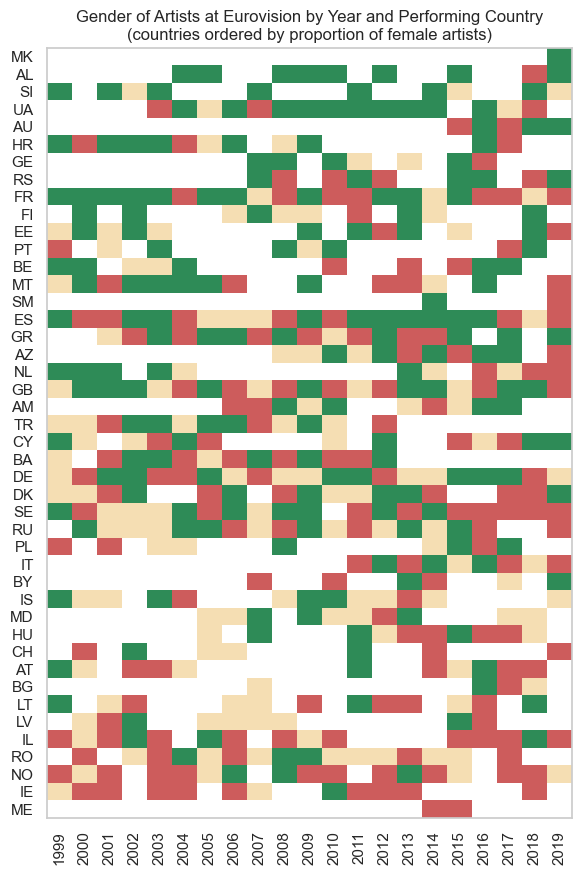

In [802]:
# This time, use the countries sorted by ratio of female performances
countries = gender_df.index.to_list()

gender_df = df[['year', 'to_code2', 'gender']].copy().drop_duplicates()

years = gender_df['year'].drop_duplicates().to_list()

gender = []
for year in years:
    missing = pd.DataFrame({'year': [year] * len(countries), 'to_code2': countries, 'gender': ['none'] * len(countries)}).set_index('to_code2')
    missing.update(gender_df[gender_df['year'] == year].set_index('to_code2'))
    gender.append(list(map(lambda x: colours[x], missing['gender'].to_list())))

gender = list(map(list, zip(*gender)))
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
img = plt.imshow(gender, aspect=0.7)
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
plt.xticks(rotation=90)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.grid(False)
plt.title('Gender of Artists at Eurovision by Year and Performing Country\n(countries ordered by proportion of female artists)')
plt.show()

In [803]:
gender_df = df[['year', 'to_code2', 'gender']].copy().drop_duplicates()

def ratio(gender, x): return len([a for a in x if a == gender]) / len(x)

gender_df = gender_df.groupby('year').agg(
    female=pd.NamedAgg(column='gender', aggfunc=lambda x: ratio('female', x)),
    group=pd.NamedAgg(column='gender', aggfunc=lambda x: ratio('group', x)),
    male=pd.NamedAgg(column='gender', aggfunc=lambda x: ratio('male', x)),
)

gender_df.head()

,female,group,male
year,,,
1999,0.478261,0.347826,0.173913
2000,0.347826,0.347826,0.304348
2001,0.260870,0.304348,0.434783
2002,0.608696,0.260870,0.130435
2003,0.440000,0.240000,0.320000


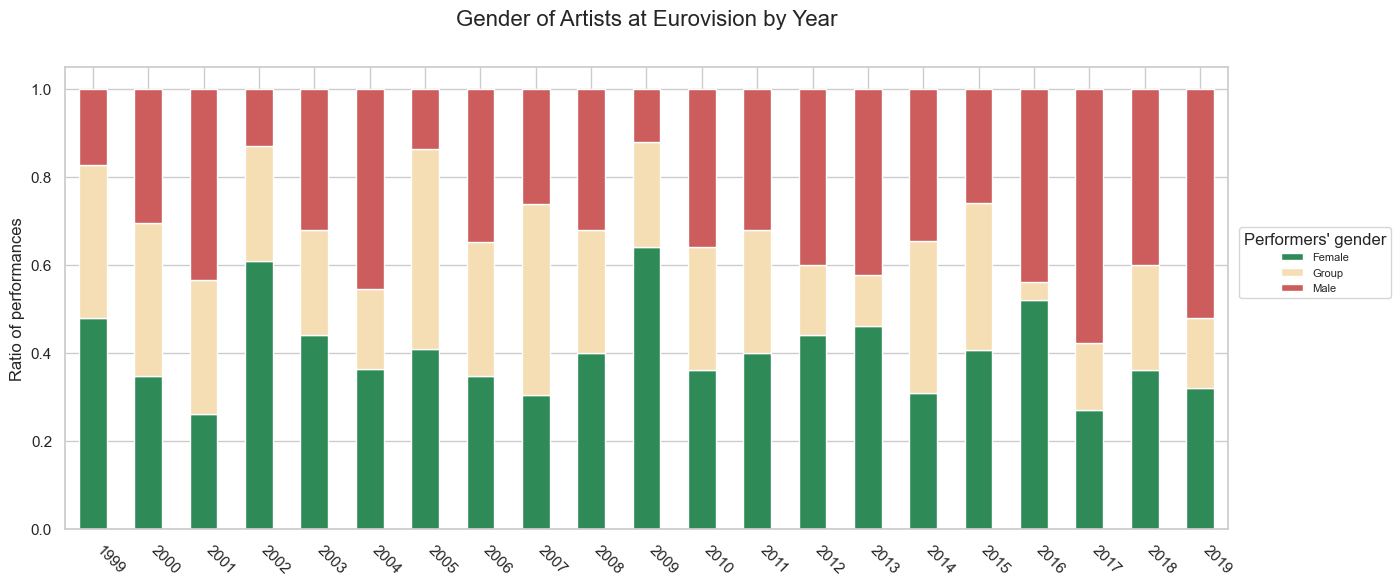

In [804]:
gender_df[colors.keys()].plot(kind='bar', figsize=(15, 6), stacked=True, color=colors)

plt.legend(['Female', 'Group', 'Male'], title="Performers' gender", loc=[1, 1], fontsize=8,  bbox_to_anchor=(0.51, 0., 0.5, 0.5))
plt.title('Gender of Artists at Eurovision by Year', fontsize=16, pad=30)
plt.xticks(rotation=-45, ha='left')
plt.xlabel('')
plt.ylabel('Ratio of performances')
plt.show()

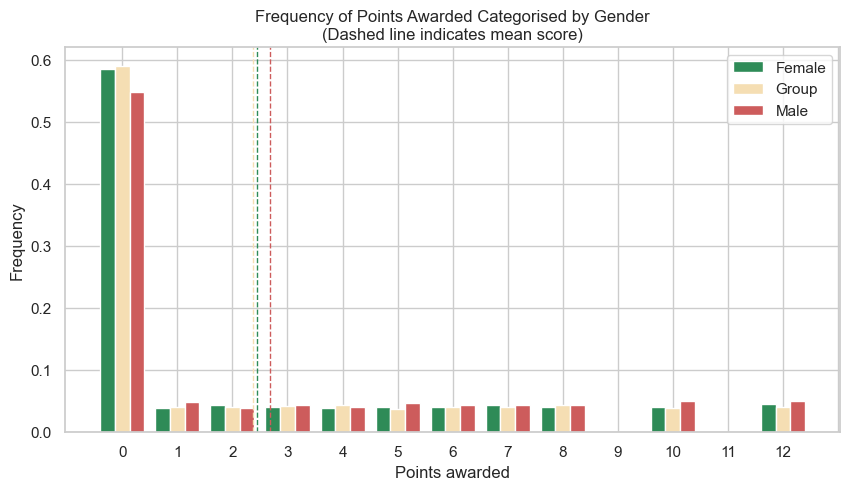

In [805]:
gender_df = df[['year', 'to_code2', 'gender', 'votes']].copy()
genders = list(colours.keys())[:3]
votes = []
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
for gender in genders:
    votes_df = gender_df[gender_df['gender'] == gender]['votes']
    votes.append(votes_df)
    plt.axvline(votes_df.mean(), color=colours[gender], linestyle='dashed', linewidth=1)

plt.hist(votes, density=True, bins=range(14), color=list(colours.values())[:3], label=[gender.title() for gender in genders], align='left')
plt.xlabel('Points awarded')
plt.ylabel('Frequency')
plt.title('Frequency of Points Awarded Categorised by Gender\n(Dashed line indicates mean score)')
plt.legend()
plt.xticks(range(14))
ax.set_xticklabels(list(range(13)) + [""])
plt.show()

In [806]:
# The graph is dominated by the null point scores
# So it might be interesting to rescale the y-axis to just focus on the non-null scores

grouped_non_zero = gender_df[['gender', 'votes', 'to_code2']][gender_df['votes'] > 0].groupby(['gender', 'votes']).count() / gender_df[['gender', 'to_code2']].groupby(['gender']).count()
max_non_zero = grouped_non_zero.max()['to_code2']
print('Maximum proportion for non-zero entries: {}'.format(max_non_zero))

Maximum proportion for non-zero entries: 0.051078738705513556


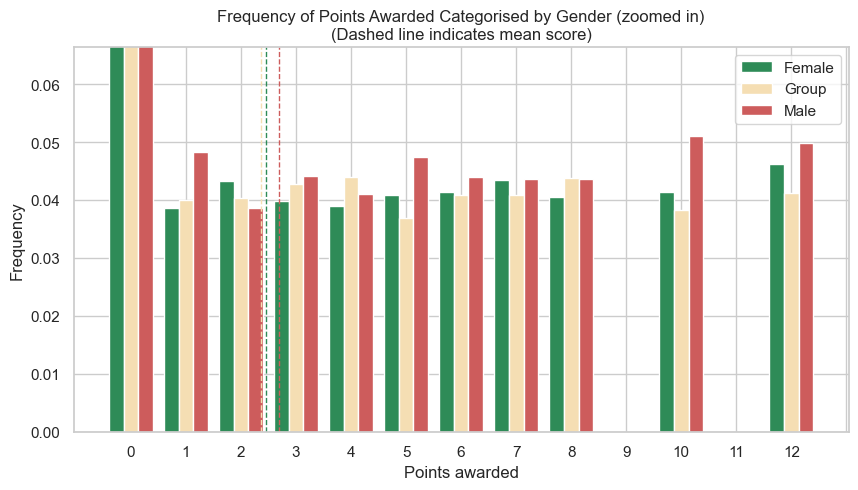

In [807]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

for gender in genders:
    votes_df = gender_df[gender_df['gender'] == gender]['votes']
    plt.axvline(votes_df.mean(), color=colours[gender], linestyle='dashed', linewidth=1)

plt.hist(votes, density=True, bins=range(14), color=list(colours.values())[:3], label=[gender.title() for gender in genders], align='left')
plt.xlabel('Points awarded')
plt.ylabel('Frequency')
plt.title('Frequency of Points Awarded Categorised by Gender (zoomed in)\n(Dashed line indicates mean score)')
plt.legend()
plt.xticks(range(14))
ax.set_xticklabels(list(range(13)) + [""])
plt.ylim(0, max_non_zero * 1.3)
plt.show()

In [808]:
for gender in genders:
    votes_df = gender_df[gender_df['gender'] == gender]['votes']
    print('Vote mean for {} artists: {}'.format(gender, votes_df.mean()))

Vote mean for female artists: 2.4531433361274098
Vote mean for group artists: 2.37130905511811
Vote mean for male artists: 2.690392771528674
